**Module 3: Introduction to NN Frameworks**

**Problem Statement:** This assignment challenges students to construct and train a neural network to accurately classify handwritten digits from the MNIST dataset. The goal is to navigate through the preprocessing of image data, select an appropriate neural network architecture, and apply optimization techniques to achieve high classification accuracy.
**Introduction:** The MNIST dataset is a large database of handwritten digits commonly used for training various image processing systems. The dataset contains 60,000 training images and 10,000 testing images, each of which is a 28x28 pixel grayscale image. The goal is to build a neural network model that can accurately classify these images into one of the ten digit classes (0 through 9).

**Objectives:**

**Data Preprocessing:** Prepare the MNIST dataset for training and testing the neural network model. This includes normalization of image pixel values and converting the output labels to a one-hot encoded format

In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
type(x_train)

numpy.ndarray

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [8]:
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

In [9]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [10]:
print(x_train_flat.shape)
print(x_test_flat.shape)
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [11]:
print(y_train[276])
print(y_train_ohe[276])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
print(y_train)
print(y_train.shape)

[5 0 4 ... 5 6 8]
(60000,)


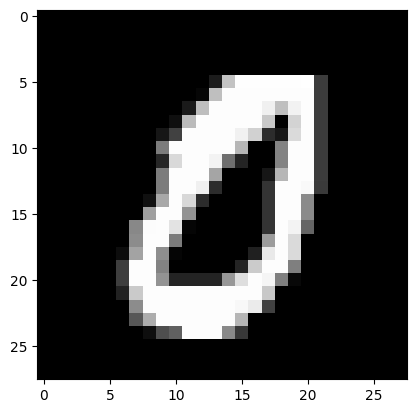

In [13]:
plt.imshow(x_train[81], cmap="gray")
plt.show()

**Model Development:** Create a neural network model capable of classifying 28x28 pixel grayscale images of handwritten digits. The model should have an input layer, one or more hidden layers, and an output layer.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import Adadelta,SGD

In [15]:
### DEFINE THE MODEL ARCHITECTURE

'''
Softmax helps in converting all the ouputs of the 10 units into probabilities. If not for that
the model would return numeric outputs ranging between (-inf, +inf)
'''
model = Sequential() # Empty model without any inputs or outputs
model.add(Input(shape=(784,))) # No computation happens here
model.add(Dense(units=100,activation="relu", kernel_regularizer=L1L2(l1=0, l2=0.5)))
# model.add(Dropout(0.1))
model.add(Dense(units=10, activation = "softmax")) # Multi class classification output.
# model.add(Dense(units=1)) # Last layer - regresssion problem

Training: Train the neural network model using the preprocessed training data. Utilize categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and track accuracy as a performance metric.

In [16]:
### COMPILATION
# binary_crossentropy
#model.compile(optimizer=Adadelta(learning_rate=0.05),
              #loss="categorical_crossentropy",
              #metrics="accuracy")
# sgd = stochastic gradient descent
model.compile(optimizer=SGD(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics="accuracy")

**Evaluation**: Evaluate the performance of the trained model using the testing dataset, ensuring that the model generalizes well to unseen data.

In [17]:
### FIT : Pass datasets (train and test) and define iterations

model.fit(x=x_train_flat, y=y_train_ohe, epochs=30, validation_data=(x_test_flat, y_test_ohe), batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 78.5789 - accuracy: 0.8185 - val_loss: 61.9033 - val_accuracy: 0.8709
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 51.2542 - accuracy: 0.8796 - val_loss: 42.0639 - val_accuracy: 0.8769
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 34.9307 - accuracy: 0.8933 - val_loss: 28.8133 - val_accuracy: 0.8927
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 23.9210 - accuracy: 0.9078 - val_loss: 19.7873 - val_accuracy: 0.9052
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 16.4252 - accuracy: 0.9224 - val_loss: 13.6242 - val_accuracy: 0.9105
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 11.2987 - accuracy: 0.9347 - val_loss: 9.4105 - val_accuracy: 0.9208
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 7.7897 - accuracy: 0.9437 - val_loss: 6.5136 - va

In [18]:
import matplotlib.pyplot as plt

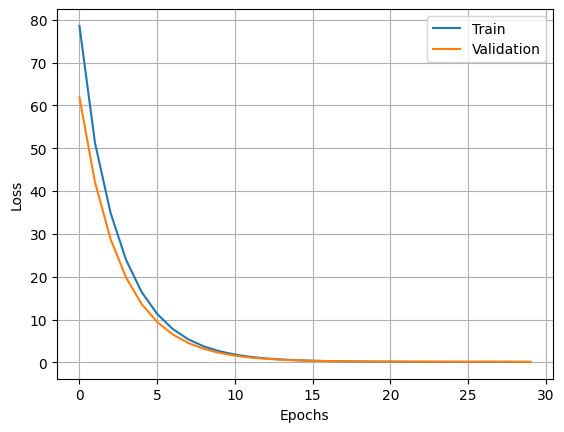

In [19]:
history = model.history.history

train_loss= history["loss"]
val_loss= history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

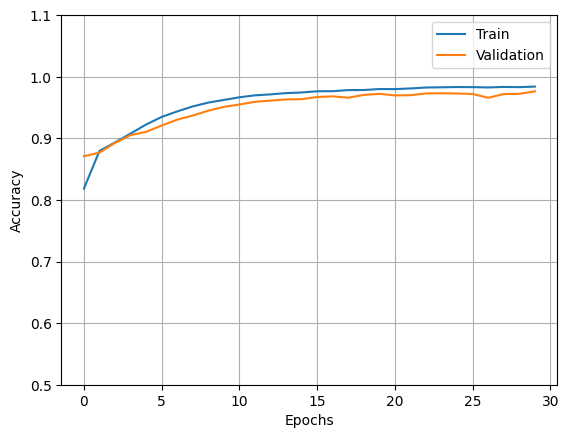

In [20]:
train_acc= history["accuracy"]
val_acc= history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Prediction:** Implement functionality to make predictions on single images or batches of images, returning the digit class with the highest probability.
**Analysis:** Analyze the results, understand the model's performance, and explore ways to improve it if necessary.

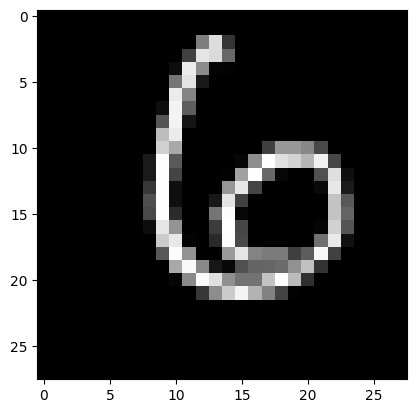

In [22]:
plt.imshow(x_test[100], cmap="gray")
plt.show()

In [23]:
preds = model.predict(x_test_flat)

313/313 [==============================] - 1s 2ms/step


In [24]:
preds.shape

(10000, 10)

In [26]:
print(preds[106])
print(np.argmax(preds[106]))

[1.8401499e-05 2.3433465e-08 9.9994725e-01 1.7854550e-06 3.2485998e-06
 1.3230454e-08 2.9651014e-07 2.4948483e-06 1.6881335e-05 9.5374089e-06]
2
